In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_df = train_df.set_index('Id')
test_df = test_df.set_index('Id')

In [4]:
all_data_df = pd.concat((train_df, test_df))
all_data_df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [5]:
missing_df = pd.DataFrame(all_data_df.isnull().sum().sort_values(ascending=False)/len(all_data_df), columns=['percentage'])
missing_df[missing_df['percentage'] > 0.01]

,percentage
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
SalePrice,0.499829
FireplaceQu,0.486468
LotFrontage,0.166495
GarageCond,0.054471
GarageFinish,0.054471
GarageQual,0.054471


Alley는 pave가 높은 영향이 있어보이고 NA의 경우 No alley access를 뜻하므로 fillna를 해주지만 나머지 3개의 feature에 대해서는 유의미한 상관관계가 보이지도 않을뿐더라 결측치도 많기 때문에 그냥 drop을 하는 결정을 함

In [6]:
all_data_df['Alley'] = all_data_df['Alley'].fillna('None')
all_data_df = all_data_df.drop('MiscFeature', axis=1)
all_data_df = all_data_df.drop('Fence', axis=1)
all_data_df = all_data_df.drop('PoolQC', axis=1)

확실히 상관성이 있는 것으로 보임 따라서 NaN의 경우 None으로 fill해줌

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

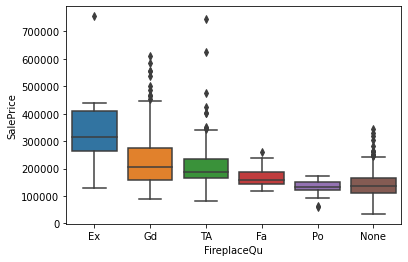

In [10]:
all_data_df['FireplaceQu'] = all_data_df['FireplaceQu'].fillna('None')

sns.boxplot(data= all_data_df, x= 'FireplaceQu', y='SalePrice', 
            order=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'])

In [11]:
len(all_data_df.columns)

77

In [12]:
all_data_df.isnull().sum().sort_values(ascending=False)[all_data_df.isnull().sum().sort_values(ascending=False) > 0]

SalePrice       1459
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
BsmtFullBath       2
Functional         2
Utilities          2
Electrical         1
SaleType           1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
BsmtFinSF2         1
Exterior1st        1
KitchenQual        1
GarageCars         1
GarageArea         1
BsmtFinSF1         1
dtype: int64

In [14]:
nan_column_list = all_data_df.isnull().sum().sort_values(ascending=False)[all_data_df.isnull().sum().sort_values(ascending=False) > 0].index.tolist()

In [15]:
for column in nan_column_list:
    print(f'{column}의 타입 : {all_data_df[column].dtypes}')

SalePrice의 타입 : float64
LotFrontage의 타입 : float64
GarageCond의 타입 : object
GarageYrBlt의 타입 : float64
GarageFinish의 타입 : object
GarageQual의 타입 : object
GarageType의 타입 : object
BsmtExposure의 타입 : object
BsmtCond의 타입 : object
BsmtQual의 타입 : object
BsmtFinType2의 타입 : object
BsmtFinType1의 타입 : object
MasVnrType의 타입 : object
MasVnrArea의 타입 : float64
MSZoning의 타입 : object
BsmtHalfBath의 타입 : float64
BsmtFullBath의 타입 : float64
Functional의 타입 : object
Utilities의 타입 : object
Electrical의 타입 : object
SaleType의 타입 : object
BsmtUnfSF의 타입 : float64
TotalBsmtSF의 타입 : float64
Exterior2nd의 타입 : object
BsmtFinSF2의 타입 : float64
Exterior1st의 타입 : object
KitchenQual의 타입 : object
GarageCars의 타입 : float64
GarageArea의 타입 : float64
BsmtFinSF1의 타입 : float64


object 타입의 column들의 description을 보고 None또는 mode를 통해 fill해주고 float의 경우도 분포를 본 뒤에 fill을 해준다

In [16]:
# GarageCond, GarageQual, GarageFinish, GarageType은 NaN을 None으로 채워준다
# BsmtExposure, BsmtCond, BsmtQual, BsmtFinType2, BsmtFinType1 은 NaN을 None으로 채워준다
for feature in ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 
'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    all_data_df[feature] = all_data_df[feature].fillna('None')

In [17]:
# NaN은 None으로 치환이 마땅해보임
all_data_df['MasVnrType'].unique()


array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [18]:
all_data_df['MasVnrType'] = all_data_df['MasVnrType'].fillna('None')

In [19]:
# MSZoning은 가장 많은 값으로 채우는게 맞아보임
all_data_df['MSZoning'].value_counts() / len(all_data_df['MSZoning'])

RL         0.775951
RM         0.157588
FV         0.047619
RH         0.008907
C (all)    0.008565
Name: MSZoning, dtype: float64

In [20]:
all_data_df['MSZoning'] = all_data_df['MSZoning'].fillna(all_data_df['MSZoning'].mode()[0])

In [590]:
# functional은 일반적인 타입인 Type로 채워주는 것이 맞아보임 -> drop이 맞을 것 같은디..
all_data_df['Functional'].value_counts() / len(all_data_df['Functional'])

Typ     0.930798
Min2    0.023981
Min1    0.022268
Mod     0.011990
Maj1    0.006509
Maj2    0.003083
Sev     0.000685
Name: Functional, dtype: float64

In [21]:
all_data_df = all_data_df.drop(['Functional'], axis = 1)

In [22]:
# drop이 마땅해보임
all_data_df['Utilities'].value_counts() / len(all_data_df['Utilities'])

AllPub    0.998972
NoSeWa    0.000343
Name: Utilities, dtype: float64

In [23]:
all_data_df = all_data_df.drop(['Utilities'], axis= 1)

In [24]:
# 가장 많은 걸로 채워준다
all_data_df['KitchenQual'].value_counts() / len(all_data_df['KitchenQual'])

TA    0.511134
Gd    0.394313
Ex    0.070230
Fa    0.023981
Name: KitchenQual, dtype: float64

In [25]:
all_data_df['KitchenQual'] = all_data_df['KitchenQual'].fillna(all_data_df['KitchenQual'].mode()[0])

In [26]:
# 가장 많은 걸로 채워준다 -> drop하는 것이 나을 것 같음
all_data_df['Electrical'].value_counts() / len(all_data_df['Electrical'])

SBrkr    0.915039
FuseA    0.064406
FuseF    0.017129
FuseP    0.002741
Mix      0.000343
Name: Electrical, dtype: float64

In [27]:
all_data_df = all_data_df.drop(['Electrical'], axis= 1)

In [28]:
# 가장 많은 걸로 채워준다
all_data_df['Exterior2nd'].value_counts() / len(all_data_df['Exterior2nd'])

VinylSd    0.347379
MetalSd    0.153135
HdBoard    0.139089
Wd Sdng    0.133950
Plywood    0.092497
CmentBd    0.043165
Wd Shng    0.027749
BrkFace    0.016101
Stucco     0.016101
AsbShng    0.013018
Brk Cmn    0.007537
ImStucc    0.005139
Stone      0.002055
AsphShn    0.001370
CBlock     0.001028
Other      0.000343
Name: Exterior2nd, dtype: float64

In [29]:
all_data_df['Exterior2nd'] = all_data_df['Exterior2nd'].fillna(all_data_df['Exterior2nd'].mode()[0])

In [30]:
# 가장 많은 걸로 채워준다 -> drop이 나을 것 같음 -> 채우는게 나을 것 같음
all_data_df['SaleType'].value_counts() / len(all_data_df['SaleType'])

WD       0.865022
New      0.081877
COD      0.029805
ConLD    0.008907
CWD      0.004111
ConLI    0.003083
ConLw    0.002741
Oth      0.002398
Con      0.001713
Name: SaleType, dtype: float64

In [31]:
all_data_df['SaleType'] = all_data_df['SaleType'].fillna(all_data_df['SaleType'].mode()[0])

In [32]:
# 가장 많은 걸로 채워준다
all_data_df['Exterior1st'].value_counts() / len(all_data_df['Exterior1st'])

VinylSd    0.351148
MetalSd    0.154162
HdBoard    0.151422
Wd Sdng    0.140802
Plywood    0.075711
CemntBd    0.043165
BrkFace    0.029805
WdShing    0.019185
AsbShng    0.015074
Stucco     0.014731
BrkComm    0.002055
AsphShn    0.000685
Stone      0.000685
CBlock     0.000685
ImStucc    0.000343
Name: Exterior1st, dtype: float64

In [33]:
all_data_df['Exterior1st'] = all_data_df['Exterior1st'].fillna(all_data_df['Exterior1st'].mode()[0])

In [34]:
nan_column_list = all_data_df.isnull().sum().sort_values(ascending=False)[all_data_df.isnull().sum().sort_values(ascending=False) > 0].index.tolist()

for column in nan_column_list:
    print(f'{column}의 타입 : {all_data_df[column].dtypes}')

SalePrice의 타입 : float64
LotFrontage의 타입 : float64
GarageYrBlt의 타입 : float64
MasVnrArea의 타입 : float64
BsmtFullBath의 타입 : float64
BsmtHalfBath의 타입 : float64
TotalBsmtSF의 타입 : float64
BsmtUnfSF의 타입 : float64
BsmtFinSF2의 타입 : float64
BsmtFinSF1의 타입 : float64
GarageArea의 타입 : float64
GarageCars의 타입 : float64


In [35]:
# LotFrontage는 neighborhood로 묶은 뒤 median으로 채운다
all_data_df['LotFrontage'] = all_data_df.groupby('Neighborhood')['LotFrontage'].apply(
    lambda x: x.fillna(x.median())
)

In [36]:
# NaN값이면 지어지지 않았다고 판단 -> 0으로 채운다
for feature in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data_df[feature] = all_data_df[feature].fillna(0)

In [37]:
# MasVnrArea, BsmtFullBath, TotalBsmtSF, BsmtFinSF1, BsmtUnfSF가 NaN은 None으로 봐야해서 0으로 채운다
for feature in ['MasVnrArea', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtUnfSF']:
    all_data_df[feature] = all_data_df[feature].fillna(0)

In [38]:
nan_column_list = all_data_df.isnull().sum().sort_values(ascending=False)[all_data_df.isnull().sum().sort_values(ascending=False) > 0].index.tolist()

for column in nan_column_list:
    print(f'{column}의 타입 : {all_data_df[column].dtypes}')

SalePrice의 타입 : float64
BsmtHalfBath의 타입 : float64
BsmtFinSF2의 타입 : float64


In [39]:
for col in ['BsmtHalfBath', 'BsmtFinSF2']:
    all_data_df[col] = all_data_df[col].fillna(0)

### astype으로 바꿔준다
OverallQual(점수라서 굳이 안 해도 될 것 같음), YearBuilt, YearRemodAdd, GarageYrBlt

In [45]:
for feature in ['OverallCond','OverallQual','MSSubClass','YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']:
    all_data_df[feature] = all_data_df[feature].astype('str')

In [46]:
from sklearn.decomposition import PCA

In [87]:
all_data_df.shape

(2919, 74)

In [51]:
object_columns = all_data_df.dtypes[all_data_df.dtypes == object].index.tolist()
numeric_columns = all_data_df.dtypes[all_data_df.dtypes != object].index.tolist()

In [56]:
object_columns_df = all_data_df[object_columns]
numeric_columns_df = all_data_df[numeric_columns]

In [101]:
object_columns_df.shape, numeric_columns_df.shape, all_data_df.shape

((2919, 45), (2919, 29), (2919, 74))

In [225]:
pca = PCA(n_components = 3)
pca.fit(numeric_columns_df.iloc[:,:-1])

PCA(n_components=3)

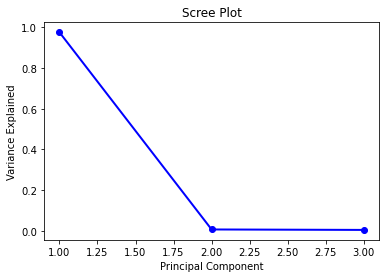

In [226]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [227]:
df_pca = pca.transform(numeric_columns_df.iloc[:,:-1])

In [228]:
numeric_columns_df['SalePrice'].shape, object_columns_df.shape, df_pca.shape

((2919,), (2919, 45), (2919, 3))

In [229]:
df_pca = pd.DataFrame(df_pca, columns=['pca_1', 'pca_2', 'pca_3'])
df_pca.index = df_pca.index + 1
new_df = pd.concat([df_pca, object_columns_df, numeric_columns_df['SalePrice']], axis=1)
new_df.shape

(2919, 49)

In [230]:
new_df

,pca_1,pca_2,pca_3,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,-1717.729531,-17.309600,-215.003416,60,RL,Pave,None,Reg,Lvl,Inside,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500.0
2,-562.574405,105.557577,645.490070,20,RL,Pave,None,Reg,Lvl,FR2,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500.0
3,1082.330865,-1.749034,-432.233017,60,RL,Pave,None,IR1,Lvl,Inside,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500.0
4,-623.072611,-141.123795,-518.124876,70,RL,Pave,None,IR1,Lvl,Corner,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000.0
5,4110.042253,500.819916,-599.921700,60,RL,Pave,None,IR1,Lvl,FR2,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-8261.229283,-733.314205,-285.644381,160,RM,Pave,None,Reg,Lvl,Inside,...,0.0,None,None,None,Y,6,2006,WD,Normal,NaN
2916,-8298.971779,-657.712858,-99.774851,160,RM,Pave,None,Reg,Lvl,Inside,...,1970.0,Unf,TA,TA,Y,4,2006,WD,Abnorml,NaN
2917,9833.823304,-232.709374,825.219818,20,RL,Pave,None,Reg,Lvl,Inside,...,1960.0,Unf,TA,TA,Y,9,2006,WD,Abnorml,NaN
2918,256.120990,-495.036340,590.091220,85,RL,Pave,None,Reg,Lvl,Inside,...,0.0,None,None,None,Y,7,2006,WD,Normal,NaN


In [231]:
preprocessing_df = new_df.copy()
preprocessing_y = preprocessing_df.pop('SalePrice')
preprocessing_x = preprocessing_df

In [232]:
preprocessing_x = pd.get_dummies(preprocessing_x)

In [233]:
preprocessing_x.shape, all_data_df.shape

((2919, 576), (2919, 74))

In [234]:
preprocessing_train_x = preprocessing_x.iloc[:len(train_df)]
preprocessing_train_y = preprocessing_y.iloc[:len(train_df)]

preprocessing_test_x = preprocessing_x.iloc[len(train_df):]
preprocessing_test_y = preprocessing_y.iloc[len(train_df):]
len(preprocessing_train_y),len(preprocessing_train_x), len(preprocessing_test_x), len(preprocessing_test_y)

(1460, 1460, 1459, 1459)

In [239]:
preprocessing_train_x.shape

(1460, 576)

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
split_train_x, split_test_x, split_train_y, split_test_y = train_test_split(preprocessing_train_x, preprocessing_train_y, test_size=0.2)

### 1. RFE를 통해 feature Selection

### Model

In [209]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor as xgb
from lightgbm import LGBMRegressor as lgb
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

DTR

In [212]:
from sklearn.metrics import r2_score, mean_squared_error

In [210]:
param_grid = { 'max_depth' : [7, 8, 9, 15,10, 20] ,
               'max_leaf_nodes' : [None, 5,15,20] ,'min_samples_split' : [10, 15, 20],
              }
            
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, refit=True, verbose=1, scoring = 'neg_mean_squared_error')
grid_dt.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 8, 9, 15, 10, 20],
                         'max_leaf_nodes': [None, 5, 15, 20],
                         'min_samples_split': [10, 15, 20]},
             scoring='neg_mean_squared_error', verbose=1)

In [211]:
grid_dt.best_params_

{'max_depth': 9, 'max_leaf_nodes': None, 'min_samples_split': 20}

In [213]:
r2_score(split_test_y, grid_dt.predict(split_test_x))

0.7615279318376156

RF

In [237]:
param_grid = { 
    'n_estimators': [200, 300, 350],
    'max_features': [0.8,0.9, 1.0, 'sqrt'],
    'max_depth' : [20, 30, 35],
}

rfr = RandomForestRegressor()
grid_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

grid_rfr.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...max_depth=20, max_features=0.8, n_estimators=200; total time=   7.3s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=200; total time=   7.4s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=200; total time=   7.4s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=200; total time=   7.5s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=200; total time=   7.5s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=300; total time=  10.9s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=300; total time=  10.9s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=300; total time=  11.0s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=300; total time=  11.0s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=300; total time=  11.0s
[CV] END ...max_depth=20, max_features=0.8, n_estimators=350; total time=  12.7s
[CV] END ...max_depth=20, max_features=0.8, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 35],
                         'max_features': [0.8, 0.9, 1.0, 'sqrt'],
                         'n_estimators': [200, 300, 350]},
             verbose=2)

In [240]:
grid_rfr.best_params_

{'max_depth': 30, 'max_features': 0.8, 'n_estimators': 300}

In [241]:
r2_score(split_test_y, grid_rfr.predict(split_test_x))

0.8651723030141322

In [386]:
np.sqrt(mean_squared_error(split_test_y, grid_rfr.predict(split_test_x)))

26551.340671494832

### XGBoost

In [247]:
param_grid_xgb = {'learning_rate' :[0.028,0.03, 0.032], 'max_depth' : [4, 5,6], 
          'n_estimators': [200, 250],
          #'reg_alpha':[0.4640], 'reg_lambda': [0.8571],
          'subsample': [0.35, 0.4 ,0.5], 'nthread' :  [-1], 'random_state' : [7]}

In [248]:
model_xgb = xgb()
grid_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=5, verbose=1, n_jobs=-1)


In [249]:
grid_xgb.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.028, 0.03, 0.032],
                         'max_depth': [4, 5, 6], 'n_estimators': [200, 250],
                         'nthread': [-1], 'random_state': [7],
                         'subsample': [0.35, 0.4, 0.5]},
             verbose=1)

In [250]:
grid_xgb.best_params_

{'learning_rate': 0.03,
 'max_depth': 5,
 'n_estimators': 250,
 'nthread': -1,
 'random_state': 7,
 'subsample': 0.4}

In [251]:
r2_score(split_test_y, grid_xgb.predict(split_test_x))

0.8857067454874272

In [393]:
from sklearn.model_selection import cross_val_score

In [397]:
from xgboost import plot_importance

### LGBM

In [272]:
param_grid_lgbm = {'learning_rate' : [0.05, 0.045, 0.4, 0.3], 'max_depth' : [3, 4,5,6], 
                  'n_estimators' : [400, 800, 1200, 1400, 1600],
                  'subsample' : [0.2,0.3, 0.1], 
                  'random_state' : [7]
}

In [273]:
lgbm = lgb()
grid_lgb = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=5, verbose=1, n_jobs=-1)

In [274]:
grid_lgb.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.045, 0.4, 0.3],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [400, 800, 1200, 1400, 1600],
                         'random_state': [7], 'subsample': [0.2, 0.3, 0.1]},
             verbose=1)

In [275]:
grid_lgb.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 1600,
 'random_state': 7,
 'subsample': 0.2}

In [276]:
r2_score(split_test_y, grid_lgb.predict(split_test_x))

0.8561131334194503

## GBD

In [281]:
gbd_params = {'n_estimators' : [2000, 2500, 3000], 'learning_rate' : [0.02,0.03,0.04], 'max_depth' : [2,3,4], 'max_features' : ['sqrt'],
                                               'min_samples_leaf' : [15, 20], 'min_samples_split' : [3, 4], 'loss' : ['huber'],
                                               'random_state' : [7]
}
GBest = GradientBoostingRegressor()
grid_gbd = GridSearchCV(estimator=GBest, param_grid=gbd_params, cv=5, verbose=1, n_jobs=-1)

In [282]:
grid_gbd.fit(split_train_x, split_train_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.02, 0.03, 0.04], 'loss': ['huber'],
                         'max_depth': [2, 3, 4], 'max_features': ['sqrt'],
                         'min_samples_leaf': [15, 20],
                         'min_samples_split': [3, 4],
                         'n_estimators': [2000, 2500, 3000],
                         'random_state': [7]},
             verbose=1)

In [283]:
grid_gbd.best_params_

{'learning_rate': 0.03,
 'loss': 'huber',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 3,
 'n_estimators': 3000,
 'random_state': 7}

In [284]:
r2_score(split_test_y, grid_gbd.predict(split_test_x))

0.8533210214041316

## submission

In [489]:
preprocessing_test_x

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,2,80.0,11622,1,1,3,3,4,0,12,...,730.0,5,5,2,140,0,0,120,8,4
1462,3,81.0,14267,1,1,0,3,0,0,12,...,312.0,5,5,2,393,36,0,0,8,4
1463,3,74.0,13830,1,1,0,3,4,0,8,...,482.0,5,5,2,212,34,0,0,8,4
1464,3,78.0,9978,1,1,0,3,4,0,8,...,470.0,5,5,2,360,36,0,0,8,4
1465,3,43.0,5005,1,1,0,1,4,0,22,...,506.0,5,5,2,0,82,0,144,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,4,21.0,1936,1,1,3,3,4,0,10,...,0.0,3,3,2,0,0,0,0,8,4
2916,4,21.0,1894,1,1,3,3,4,0,10,...,286.0,5,5,2,0,24,0,0,8,0
2917,3,160.0,20000,1,1,3,3,4,0,11,...,576.0,5,5,2,474,0,0,0,8,0


In [491]:
sub = pd.DataFrame()
sub['Id'] = preprocessing_test_x.index
sub['SalePrice'] = grid_gbd.predict(preprocessing_test_x)
sub.to_csv('submission.csv',index=False)

<AxesSubplot:title={'center':'r2_score'}>

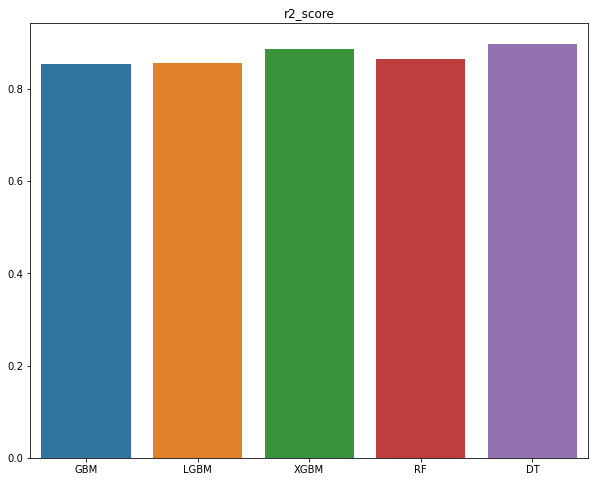

In [285]:
model_r2_score = [r2_score(split_test_y, grid_gbd.predict(split_test_x)), r2_score(split_test_y, grid_lgb.predict(split_test_x)), 
                  r2_score(split_test_y, grid_xgb.predict(split_test_x)), r2_score(split_test_y, grid_rfr.predict(split_test_x)),
                  r2_score(split_test_y, grid_dt.predict(split_test_x))]

plt.subplots(figsize=(10, 8))
plt.title('r2_score')
sns.barplot(x=['GBM', 'LGBM', 'XGBM', 'RF', 'DT'], y=model_r2_score)

<AxesSubplot:title={'center':'RMSE'}>

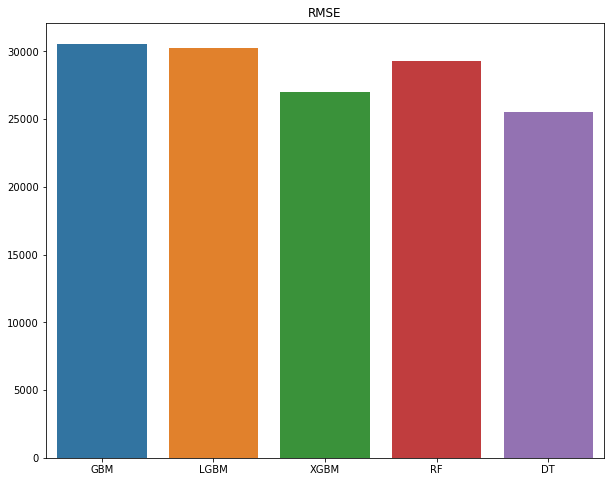

In [286]:
mean_squared_error_score = [mean_squared_error(split_test_y, grid_gbd.predict(split_test_x)), mean_squared_error(split_test_y, grid_lgb.predict(split_test_x)), 
                  mean_squared_error(split_test_y, grid_xgb.predict(split_test_x)), mean_squared_error(split_test_y, grid_rfr.predict(split_test_x)),
                  mean_squared_error(split_test_y, grid_dt.predict(split_test_x))]

plt.subplots(figsize=(10, 8))
plt.title('RMSE')
sns.barplot(x=['GBM', 'LGBM', 'XGBM', 'RF', 'DT'], y=np.sqrt(mean_squared_error_score))